<a href="https://colab.research.google.com/github/nairaanish/Fash_MNIST_Classifier/blob/master/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 686kB 3.3MB/s 


In [2]:
#Importing necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

tf.enable_eager_execution()  

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

1.14.0


In [3]:
#Importing dataset and split into test and train
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_data, test_data = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
#Pre-Processing the data
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_data =  train_data.map(normalize)
test_data  =  test_data.map(normalize)

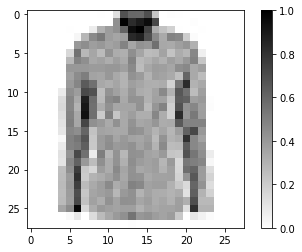

In [7]:
#Select a single image and reshape
for image, label in test_data.take(1):
  break
image = image.numpy().reshape((28,28))

#Plotting the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

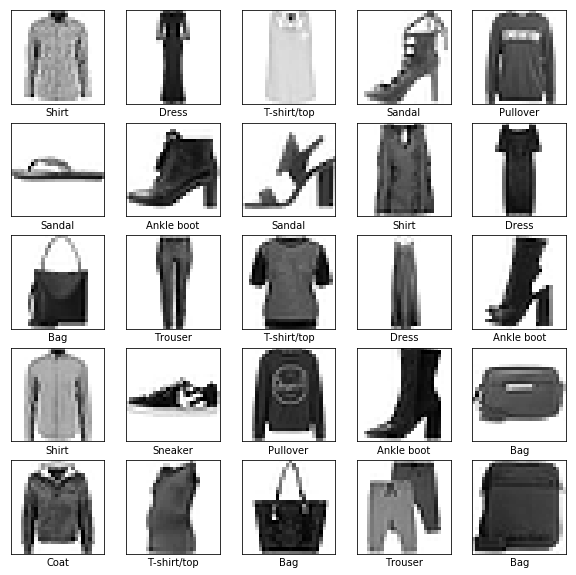

In [8]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_data.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
#Layers of neural network
#Layer 1 is flattening layer to convert the 28x28x1 image to a 784 byte array
flatten = tf.keras.layers.Flatten(input_shape = (28,28,1))
#Layer 2 is a dense layer with 128 units
hidden = tf.keras.layers.Dense(128, activation = tf.nn.relu)
#Layer 3 is another dense layer with 10 units equal to no of classes
#Use softmax as activation
output = tf.keras.layers.Dense(10, activation = tf.nn.softmax)

In [0]:
model = tf.keras.Sequential([flatten, hidden, output])

In [0]:
#Optimizing the model
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 32
train_data = train_data.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [13]:
model.fit(train_data, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4938 - acc: 0.8261
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3721 - acc: 0.8655
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3372 - acc: 0.8759
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3109 - acc: 0.8873
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2960 - acc: 0.8910


In [14]:
#Testing the accuracy
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3531 - acc: 0.8735
Accuracy on test dataset: 0.8735


In [0]:
#Making predictions
for test_images, test_labels in test_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
np.argmax(predictions[0])

6

Check test label to see if prediction is correct


In [17]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

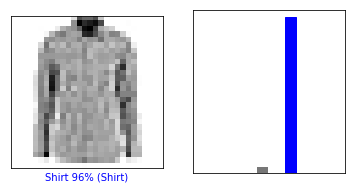

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

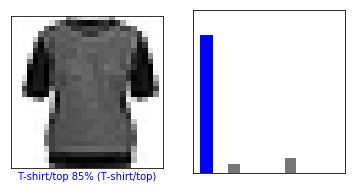

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

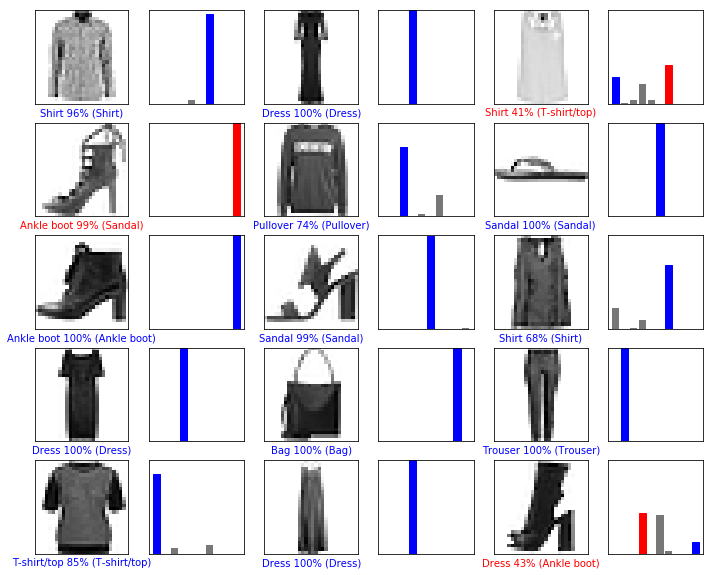

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
